# Figure 4: Average phrase contours

Here we plot the average contours in the three corpora

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
matplotlib.style.use('styles.mplstyle')

In [2]:
# Load all data
dfs, contours = load_datasets()

In [3]:
def plot_average_contour(contours, baseline, f=.25, color='C3'):
    xs = np.linspace(0, 1, contours.shape[1])
    b_mean = baseline.mean(axis=0)
    b_std = (f/2) * baseline.std(axis=0)
    plt.plot(xs, b_mean, 'k', lw=1, zorder=-1, alpha=.5, label='baseline')
    plt.fill_between(xs, b_mean-b_std, b_mean+b_std, alpha=.1, color='k',lw=0)
    
    mean = contours.mean(axis=0)
    std = f/2 * contours.std(axis=0)
    plt.plot(xs, mean, color, lw=1, label=f'phrases')
    plt.fill_between(xs, mean-std, mean+std, alpha=.2, color=color, label=f'${f:.2f}\sigma$', lw=0)
    plt.plot([0, 1], [0, 0], 'k:', lw=.5, alpha=.5)

## Plot the average contour per genre

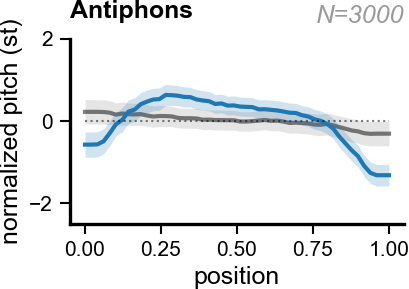

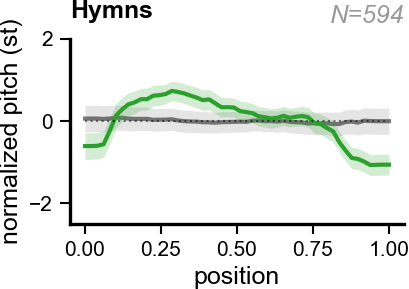

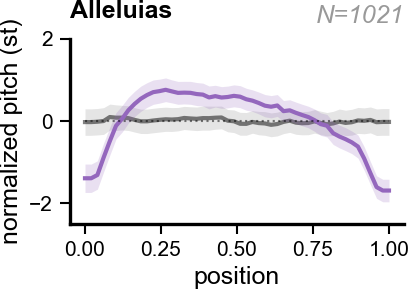

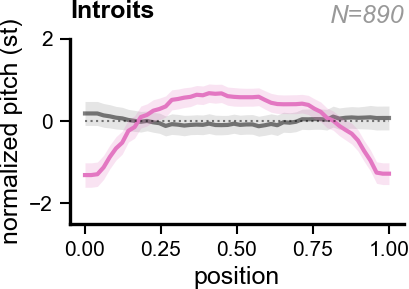

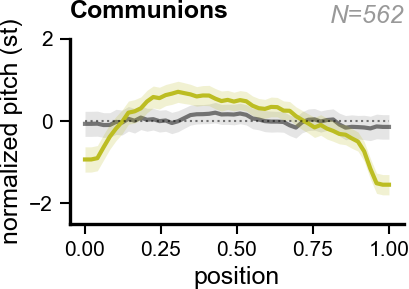

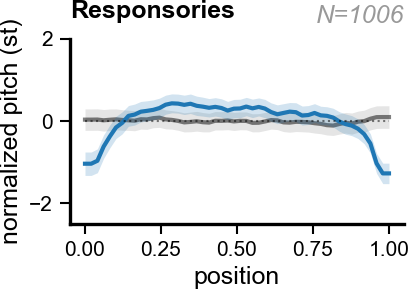

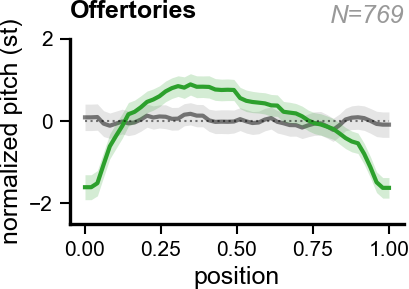

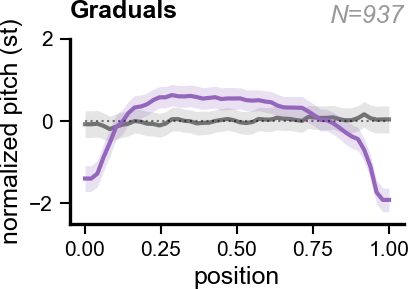

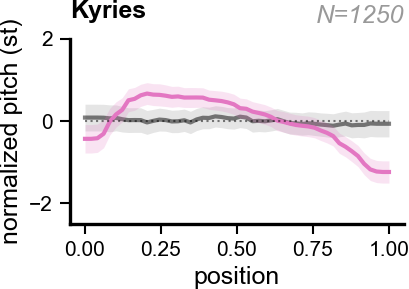

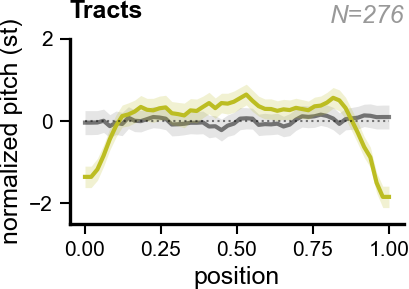

In [4]:
for i, dataset in enumerate(contours.keys()):
    if dataset.endswith('-random'): continue
    plt.figure(figsize=cm2inch(4,3))
    plot_average_contour(contours[dataset], contours[f'{dataset}-random'], color=f'C{i}')
    show_num_contours(len(contours[dataset]), plt.gca())
    plt.ylabel('normalized pitch (st)')
    plt.xlabel('position')
    plt.ylim(-2.5, 2)
    title(dataset.replace('liber-', '').title())
    plt.xlabel('position')
    plt.tight_layout()
    plt.savefig(f'../figures/fig04/{dataset}.pdf')

## Combine four genres

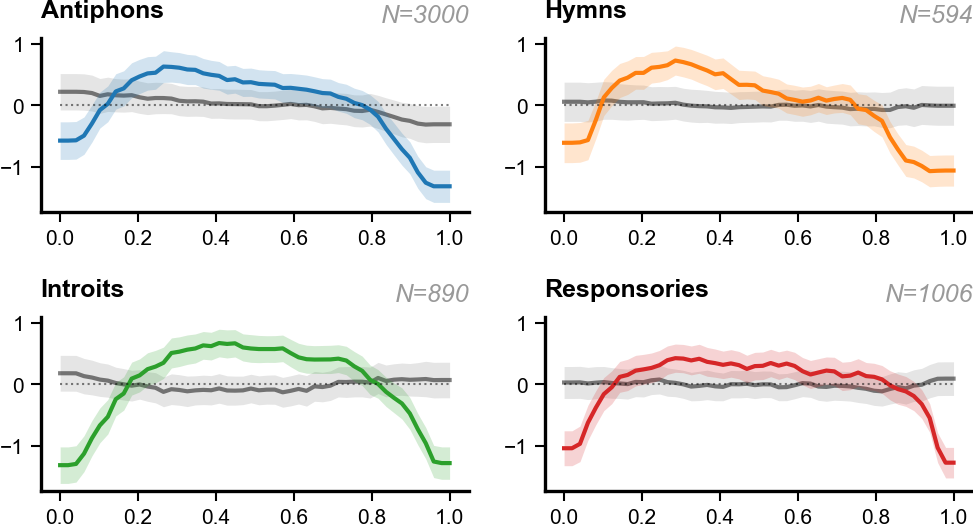

In [5]:
genres = ['antiphons', 'hymns', 'introits', 'responsories']

def show_dataset(i):
    dataset = f'liber-{genres[i]}'
    plot_average_contour(contours[dataset], contours[f'{dataset}-random'], color=f'C{i}')
    show_num_contours(len(contours[dataset]), plt.gca())
    title(dataset.replace('liber-', '').title())

plt.figure(figsize=cm2inch(8.8, 5))

ax1 = plt.subplot(221)
show_dataset(0)

ax2 = plt.subplot(222, sharey=ax1)
show_dataset(1)

ax3 = plt.subplot(223, sharey=ax1)
show_dataset(2)

ax4 = plt.subplot(224, sharey=ax1)
show_dataset(3)

plt.tight_layout()
plt.savefig('../figures/fig04/average-phrase-contours.pdf',
            bbox_inches='tight', pad_inches = 0)